In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Function to find span of the knot in knot vector

In [2]:
def FindSpan(n_inp,degree_inp,u_inp,knot_vector_inp):
    x=knot_vector_inp[degree_inp+1]
    if (u_inp < x):
        return degree_inp
    else:
        for i,pos in enumerate(knot_vector_inp):
            if math.floor(u_inp) == pos:
                return (i)


## Computing non zero basis functions and their derivatives

In [3]:
# Derivatives are stored in ders[k][j]
# ders[k][j] is the kth derivative of function N_(i-p+j,p)
# If k>p the derivatives are zero.
def DersBasisFuns(i,u,p,m,U):
    #Inititation of dimentions for 2D matrices
    ndu=np.zeros((p+1,p+1))
    ders=np.zeros((p+1,p+1))
    a=np.zeros((2,p+1))
    left =np.zeros(p+2)
    right =np.zeros(p+2)
    
    ndu[0][0]=1.0
    for j in range(1,p+1):
        left[j] = u - U[i+1-j]
        right[j] = U[i+j] - u
        saved=0.0
        for r in range(j):
            #Lower triangle
            ndu[j][r] = right[r+1]+left[j-r]
            temp=ndu[r][j-1]/ndu[j][r]
            #Upper triangle
            ndu[r][j] = saved+(right[r+1]*temp)
            saved=left[j-r]*temp
        ndu[j][j] = saved
    for j in range (p+1): #Load the basis functions
        ders[0][j]=ndu[j][p]
    #This secion computes the derivatives
    for r in range(p+1):
        s1=0
        s2=1 #Alternative rows in array a
        a[0][0] = 1.0
        #Loop to compute kth derivative
        for k in range(1,m+1):
            d=0.0
            rk=r-k
            pk=p-k
            if(r>=k):
                a[s2][0]=a[s1][0]/ndu[pk+1][rk]
                d=a[s2][0]*ndu[rk][pk]
            if(rk>=-1):
                j1=1
            else:
                j1=-rk
            if(r-1<=pk):
                j2=k-1
            else:
                j2=p-r
            for j in range (j1,j2+1):
                a[s2][j] =(a[s1][j]-a[s1][j-1])/ndu[pk+1][rk+j]
                d += (a[s2][j]*ndu[rk+j][pk])
            if(r<=pk):
                a[s2][k]=-a[s1][k-1]/ndu[pk+1][r]
                d+=(a[s2][k]*ndu[r][pk])
            ders[k][r]=d
            #Switch rows
            j=s1
            s1=s2
            s2=j
            #Multiply through by the correct factors
    r=p
    for k in range(1,m+1):
        for j in range(p+1):
            ders[k][j] =ders[k][j]* r
        r =r* (p-k)
    return ders

## Function to compute the point on a B-spline curve and all derivatives upto and including the $d_{th}$ at a fixed u value

In [4]:
def CurveDerivsAlg(n,p,U,P,u,d):
    du=min(d,p)
    CK=np.zeros((du+1,2))
    for k in range(p+1,d+1):
        CK[k] = 0.0
    span = FindSpan(n,p,u,U)
    nders=DersBasisFuns(span,u,p,du,U)
    for k in range(du+1):
        CK[k] = 0.0
        for j in range(p+1):
            CK[k]=CK[k]+nders[k][j]*P[span-p+j]
    return CK

## Test case
## Parameters

In [5]:
P = np.array([[0.,0.],[2.,0.],[1.,4.],[7.,4.],[5.,-2.],[8.,-2.],[8.,2.]])
#U=np.array([0., 0., 0., 0., 1./4., 2./4., 3./4., 1.,1.,1.,1.])
U=np.array([0., 0., 0., 0., 1., 2., 3., 4.,4.,4.,4.])
control_points=7
n=control_points-1
d=2 #Generates results till 2nd derivative
p=3 #Degree of the curve

## Derivative at a single point 'u' on the curve

In [6]:
u=0.5
derivatives=CurveDerivsAlg(n,p,U,P,u,d)
print('First derivative is:',derivatives[1])
print('Second derivative is:',derivatives[2])

First derivative is: [1.3125 3.75  ]
Second derivative is: [-3.75  3.  ]


## Crearing a loop to derivate over a span of u

In [7]:
size_of_u = 100
derivatives=np.zeros((size_of_u,2))
u_values=np.linspace(0,(max(U)-0.01),size_of_u)
for j,uu in enumerate(u_values):
    derivatives[j] = CurveDerivsAlg(n,p,U,P,uu,d)[1] #Index 0 gives actual curve, 1 gives 1st derivative.....
#Have to take care of problem with generating result at last point which encounters divide by zero
##Due to error we have to equate last term with last control point
#B_spline[size_of_u-1]=P[-1]
#print(B_spline)

## Plotting

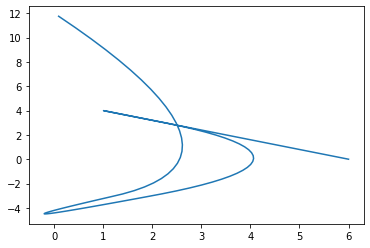

In [8]:
fig,ax=plt.subplots()
x=np.array(derivatives[:,0])
y=np.array(derivatives[:,1])
ax.plot(x,y)